##Lesson 05 Demo

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf


In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#Checks for Linear Regression. It works best when: 
1. The data is normally distributed (but doesn’t have to be)

2. X’s are independent of each other (low multicollinearity)

3. X’s significantly explain y (have low p-values)





## Check 1. Distribution

#### Last time we plotted our data like this

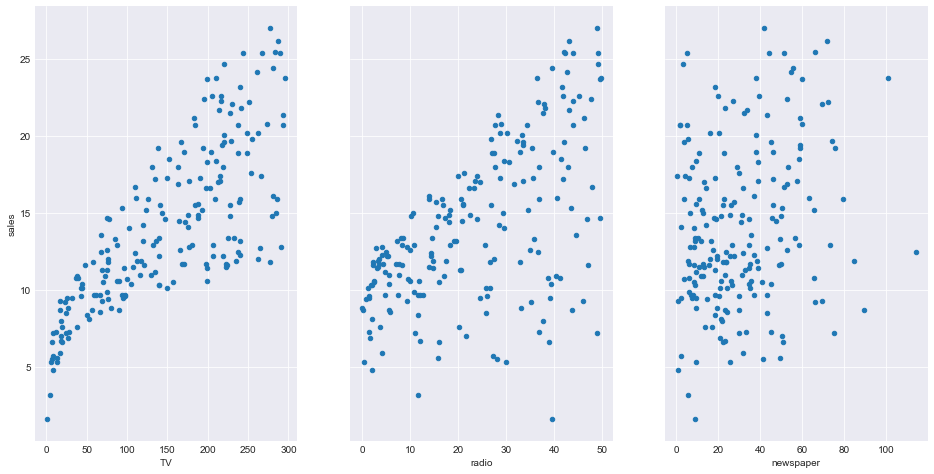

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

- TV sales: non stable variance, diminishing returns

### Seaborn plotting library 
https://stanford.edu/~mwaskom/software/seaborn/index.html

Today we use lmplot https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html


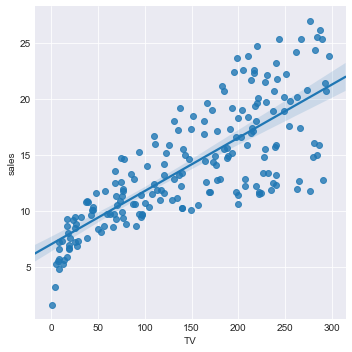

In [9]:
sns.lmplot('TV', 'sales', data)

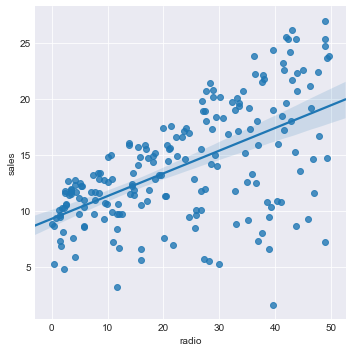

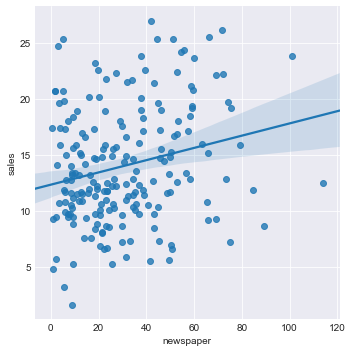

In [10]:
sns.lmplot('radio', 'sales', data)
sns.lmplot('newspaper', 'sales', data)

## Check 2. Low Multicollinearity

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


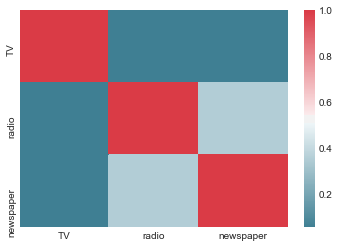

In [14]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data[['TV', 'radio', 'newspaper']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

### Student question: 
1. Do these variables have colinearity? 

Answer: 

## Check 3: X’s significantly explain y (have low p-values)

#### Let's take a look again the the crude model

In [25]:
lm = smf.ols(formula='sales ~ TV', data=data).fit() 

#this is the regression model 
#where sales are what you are trying to predict (dependant variable) and TV is your predictor (independant variable)
#the coefficient is the number that you multiply your predictor by to get your prediction 

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.47e-42
Time:                        21:33:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- interecept: this value is what you would expect (in this case sales) if your predictors are zero, in this case TV = 0.
- TV or the predictor: this value is the amount that what you are trying to predict, in this case sales, would go up by, if TV or the predictor was raised by 1 unit. so sales would go up by .0475 for every unit in crease in TV.
- std err: if you take your coefficient of either the predictor or what you are tryin to predict, and add/subtract the std err x 2, you will be brought to the range of the lower and upper bounds of the curve. it is like the std dev, going out two bands which is 97.5% of the data.
- R squared: this shows significance and can be read as, the amount that the predictor contributes to the prediction. - R^2 of 100% indicates that the model explains all the variability of the response data around its mean.
- meaning R^2 of 100% in this case of TV, would suggest that TV is the sole driver of sales.
- in this case, our model suggests that TV is the driver of 61% of sales. leaving 39% to other variables.
- note that were you to invest 100 dollars in TV your sales would NOT increase by 61%, as they would only increase by 100*.0475, which would be $4.75.


 - Important things to look out for when reading the results of a liner regression model:
 - R^2: make sure that you have a high value
 - P value: make sure it is below .05
 - if P value is large, make sure that the confidence interval (aka .025 - .975) does not contain 0 in its range.

### Student Model
#### Now do a full model with TV, Radio and Newspaper
syntax can be found here: http://statsmodels.sourceforge.net/devel/example_formulas.html

In [19]:
#fit model
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

#print the full summary
lm.summary()

#print summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.58e-96
Time:                        20:45:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#fit model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()

#print the full summary
lm.summary()

#print summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           4.83e-98
Time:                        20:49:10   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1. Which of the media buys were significantly associated with the sales? 

Answer: 

#### 2. Controlling for all the other media buys, which media type had the largest association with sales?

Answer: 

####3. Given that one of the variables above was not significant do we drop it from our model? Why or why not? 

Answer: 

In [22]:
X_variables = data[['TV', 'radio', 'newspaper']]

In [23]:
from itertools import combinations

for i in combinations(X_variables.columns,2):
    print(i)

('TV', 'radio')
('TV', 'newspaper')
('radio', 'newspaper')
